# Data Visualization - Project 1

### Group AA
Diana Furtado (m20200590@novaims.unl.pt); 
Hiromi Nakashima (m20201025@novaims.unl.pt); 
Miguel Martins (m20200671@novaims.unl.pt); 
Sofia Simão (m20200639@novaims.unl.pt)
#### This project aims to analyse **Global_Mobility_Report** dataset and understand how COVID-19 changed travel patterns around the World.


*Dataset source*: https://www.google.com/covid19/mobility/

As global communities respond to COVID-19, we've heard from public health officials that the same type of aggregated, anonymized insights we use in products such as Google Maps could be helpful as they make critical decisions to combat COVID-19.

These Community Mobility Reports aim to provide insights into what has changed in response to policies aimed at combating COVID-19. The reports chart movement trends over time by geography, across different categories of places such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential.

In [3]:
#IMPORT LIBRARIES
import sqlite3
import os
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from itertools import product
from math import ceil
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
from pandas_profiling import ProfileReport 
%config InlineBackend.figure_format = 'retina' 
from scipy.stats import iqr as IQR
from collections import Counter
import scipy.stats as stat
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objects as go
# Seeting seaborn style
sns.set()

In [4]:
# Import csv file
Project1 = pd.read_csv('Global_Mobility_Report.csv')

C:\Users\DF010760\Anaconda3\envs\Deep_Learning\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Describe and Explore dataset

In [5]:
Project1.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [6]:
Project1.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
4300708,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-02-10,NaN,NaN,NaN,NaN,-25.0,NaN
4300709,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-02-11,NaN,NaN,NaN,NaN,-28.0,NaN
4300710,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-02-12,NaN,NaN,NaN,NaN,-25.0,NaN
4300711,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-02-15,NaN,NaN,NaN,NaN,-31.0,NaN
4300712,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-02-16,NaN,NaN,NaN,NaN,-24.0,NaN


In [7]:
Project1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300713 entries, 0 to 4300712
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

In [8]:
Project1.replace("", np.nan, inplace=True)

In [9]:
# Summary statistics for all variables
Project1.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country_region_code,4297976,134,US,934553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_region,4300713,135,United States,934553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_region_1,4227486,1860,State of São Paulo,129391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_region_2,3584819,9915,Washington County,9789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metro_area,23785,65,Amman Metropolitan Area,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iso_3166_2_code,769201,2224,NZ-CAN,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
census_fips_code,915785.0,NaN,NaN,NaN,30356.460207,15299.029725,1001.0,18105.0,29115.0,45051.0,56045.0
place_id,4299977,13276,ChIJl0XlkQM3NIYRCmAmJnf-n8Q,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,4300713,368,2020-11-25,13147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retail_and_recreation_percent_change_from_baseline,2701909.0,NaN,NaN,NaN,-23.616285,27.644714,-100.0,-41.0,-20.0,-5.0,545.0


In [10]:
#FUNCTION TO SHOW MISSING VALUES AND THEIR PERCENTAGES
def missing_data(df):
    l = []
    for col in df.columns:
        missing = Project1[col].isnull().sum(axis=0)
        percentage = missing/Project1.shape[0]
        l.append([col,missing,percentage*100])
        df_missing = pd.DataFrame(l, columns = ['Feature','missing','percentage'])
        df_missing = df_missing.sort_values('missing',axis=0, ascending = False)    
    return df_missing

In [11]:
df_missing = missing_data(Project1)
df_missing = df_missing[df_missing['missing']>0]
df_missing

,Feature,missing,percentage
4,metro_area,4276928,99.446952
5,iso_3166_2_code,3531512,82.114570
6,census_fips_code,3384928,78.706205
11,parks_percent_change_from_baseline,2235583,51.981683
12,transit_stations_percent_change_from_baseline,2127730,49.473890
14,residential_percent_change_from_baseline,1798617,41.821368
10,grocery_and_pharmacy_percent_change_from_baseline,1694251,39.394654
9,retail_and_recreation_percent_change_from_base...,1598804,37.175324
3,sub_region_2,715894,16.645938
13,workplaces_percent_change_from_baseline,198009,4.604097


In [12]:
# Check duplicated observations
Project1.loc[Project1.duplicated(keep=False), :]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline


In [13]:
df = Project1.copy()

In [14]:
non_metric_features = ['metro_area','iso_3166_2_code','census_fips_code','sub_region_2','sub_region_1','country_region_code','place_id']
metric_features = df.columns.drop(non_metric_features).to_list()

In [15]:
metric_features

['country_region',
 'date',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

In [16]:
df.rename(columns = {'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation'}, inplace = True)
df.rename(columns = {'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy'}, inplace = True)
df.rename(columns = {'parks_percent_change_from_baseline':'parks'}, inplace = True)
df.rename(columns = {'transit_stations_percent_change_from_baseline':'transit_stations'}, inplace = True)
df.rename(columns = {'workplaces_percent_change_from_baseline':'workplaces'}, inplace = True)
df.rename(columns = {'residential_percent_change_from_baseline':'residential'}, inplace = True)

In [17]:
df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300708,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-02-10,NaN,NaN,NaN,NaN,-25.0,NaN
4300709,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-02-11,NaN,NaN,NaN,NaN,-28.0,NaN
4300710,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-02-12,NaN,NaN,NaN,NaN,-25.0,NaN
4300711,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-02-15,NaN,NaN,NaN,NaN,-31.0,NaN


## Pandas profile

In [36]:
prof = ProfileReport(df)
prof.to_file(output_file='Project1_GlobalMobility.html')

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

C:\Users\DF010760\Anaconda3\envs\Deep_Learning\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation

In [18]:
correlation = np.round(df.corr(),2)
correlation

,census_fips_code,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
census_fips_code,1.00,0.03,0.03,0.11,0.07,-0.01,0.01
retail_and_recreation,0.03,1.00,0.65,0.52,0.71,0.55,-0.72
grocery_and_pharmacy,0.03,0.65,1.00,0.34,0.56,0.52,-0.50
parks,0.11,0.52,0.34,1.00,0.43,0.14,-0.37
transit_stations,0.07,0.71,0.56,0.43,1.00,0.53,-0.62
workplaces,-0.01,0.55,0.52,0.14,0.53,1.00,-0.72
residential,0.01,-0.72,-0.50,-0.37,-0.62,-0.72,1.00


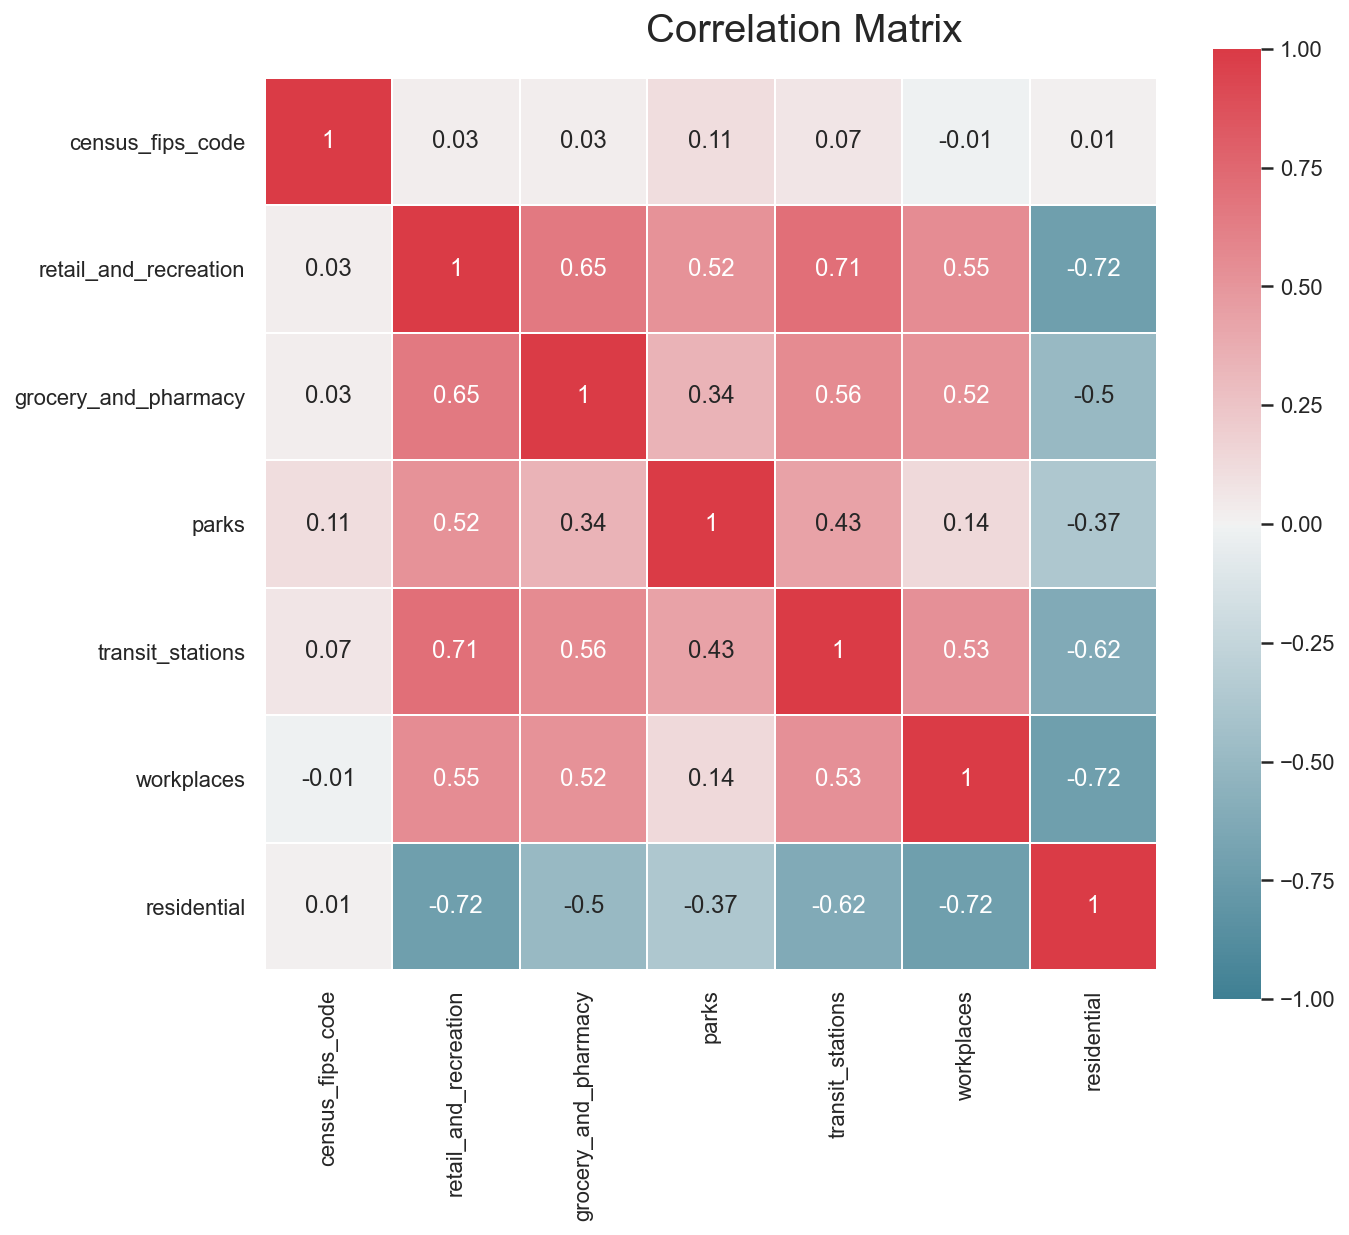

In [19]:
#Correlation matrix
fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation, annot = correlation.values,cmap=sns.diverging_palette(220, 10, as_cmap=True), 
             vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [24]:
#df_retail = dict(type='scatter',
#                  x=df['date'],
#                  y=df['retail_and_recreation'],
#                  name='Retail and recreation percent change from baseline'
#                  )
#
#df_transit = dict(type='scatter',
#                  x=df['date'],
#                  y=df['transit_stations'],
#                  name='Transit stations percent change from baseline'
#                  )
#df_parks = dict(type='scatter',
#                  x=df['date'],
#                  y=df['parks'],
#                  name='Parks percent change from baseline'
#                  )
#df_workplaces = dict(type='scatter',
#                  x=df['date'],
#                  y=df['workplaces'],
#                  name='Workplaces percent change from baseline'
#                  )
#df_residential = dict(type='scatter',
#                  x=df['date'],
#                  y=df['residential'],
#                  name='Residential percent change from baseline'
#                  )
#df_grocery = dict(type='scatter',
#                  x=df['date'],
#                  y=df['grocery_and_pharmacy'],
#                  name='Grocery and pharmacy percent change from baseline'
#                  )
#
#df_data = [df_retail, df_transit, df_parks, df_workplaces, df_residential, df_grocery]
#
#
#df_layout = dict(title=dict(text='Global mobility'),
#                  xaxis=dict(title='Date'),
#                  yaxis=dict(title='Percent change from baseline')
#                  )
#
#df_fig = go.Figure(data=df_data, layout=df_layout)
#
#df_fig.show(renderer='browser')